In [1]:
import pandas as pd
import networkx as nx
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
data_relevant = pd.read_csv("data_relevant_mars_30", sep=",")

In [3]:
data_relevant['exporter_name'].unique()

array(['Albania', 'Argentina', 'Australia', 'Austria',
       'Belgium-Luxembourg', 'Bangladesh', 'Bulgaria',
       'Bosnia Herzegovina', 'Belarus',
       'Bolivia (Plurinational State of)', 'Brazil', 'Brunei Darussalam',
       'Canada', 'Switzerland', 'Chile', 'China', "Côte d'Ivoire",
       'Cameroon', 'Colombia', 'Cyprus', 'Czechia', 'Germany', 'Denmark',
       'Algeria', 'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Finland',
       'France', 'Gabon', 'United Kingdom', 'Greece',
       'China and Hong Kong SAR', 'Croatia', 'Hungary', 'Indonesia',
       'India', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Rep. of Korea', 'Libya',
       'Sri Lanka', 'Lithuania', 'Latvia', 'Morocco', 'Mexico',
       'TFYR of Macedonia', 'Malta', 'Malaysia', 'Nigeria', 'Netherlands',
       'Norway', 'New Zealand', 'Pakistan', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Paraguay', 'Russian Federation',
       'Saudi Arabia', 'Singapore', 'S

## Construction Graph

In [144]:
list_country=list(data_relevant['importer_name'].unique())

In [145]:
Graph_2020=nx.Graph()
Graph_2020.add_nodes_from(list_country)
Graph_2020.add_edges_from(zip(data_relevant['exporter_name'],data_relevant['importer_name']))

In [146]:
'''plt.figure(3, figsize=(50,50))
nx.draw(Graph_2020, with_labels=True, font_size=12)
plt.savefig('graph_2020.png', dpi=300, bbox_inches='tight')
plt.show()'''

"plt.figure(3, figsize=(50,50))\nnx.draw(Graph_2020, with_labels=True, font_size=12)\nplt.savefig('graph_2020.png', dpi=300, bbox_inches='tight')\nplt.show()"

In [147]:
'''#in the following create a MULTIDIGRAPH. meaniing a graph which has multiple directed edges

Graph_2020_2=nx.MultiDiGraph()
Graph_2020_2 = nx.from_pandas_edgelist(data_relevant, 'exporter', 'importer', True, nx.MultiDiGraph())
plt.figure(3, figsize=(70,50))

nx.draw(Graph_2020_2, with_labels=True, font_size=50)
# plt.savefig('graph_2020.png', dpi=300, bbox_inches='tight')
plt.show()'''

"#in the following create a MULTIDIGRAPH. meaniing a graph which has multiple directed edges\n\nGraph_2020_2=nx.MultiDiGraph()\nGraph_2020_2 = nx.from_pandas_edgelist(data_relevant, 'exporter', 'importer', True, nx.MultiDiGraph())\nplt.figure(3, figsize=(70,50))\n\nnx.draw(Graph_2020_2, with_labels=True, font_size=50)\n# plt.savefig('graph_2020.png', dpi=300, bbox_inches='tight')\nplt.show()"

In [148]:
'''
node size respectively to the total volume (of imports or exports or both??)
node color respectively to a positive or negative total volume
edgesize respectively to the volume
colored edge, if important trading (>1%)
'''

'\nnode size respectively to the total volume (of imports or exports or both??)\nnode color respectively to a positive or negative total volume\nedgesize respectively to the volume\ncolored edge, if important trading (>1%)\n'

In [149]:
'''
define function that creates columns in our dataset

total_volume of exporter and importer. this will be the weight that introduces the node_size
net_trade_balance: if export_volume of exporter greater than import_volume of exporter, we have a netto export, 
which is  economically good. set node_color as green if positive and red if negative
set edge_color as blue if a certain trade is very important to the exporter (or importer?), i.e. if relative volume is larger 1%

#maybe move this step to the first notebook
'''
def introduce_total_volume(df):
    df_temp = df.copy()
    tot_vol_exp = []
    tot_vol_imp = []
    for exp in df_temp.exporter_name:
        tot_vol_exp.append(df_temp[df_temp["exporter_name"] == exp]["v2020"].sum())
    for imp in df_temp.importer_name:
        tot_vol_imp.append(df_temp[df_temp["importer_name"] == imp]["v2020"].sum())
    df_temp["total_volume_exporter"] = tot_vol_exp
    df_temp["total_volume_importer"] = tot_vol_imp
    
    return df_temp

In [150]:
data_relevant = introduce_total_volume(data_relevant)

In [151]:
def introduce_color(df):
    '''
    introduce node color and edge color.
    node color is green when country is net exporter and red otherwise
    edge color is pink when trade is an important factor, i.e. larger than 0.2 (OR 1% ???) of total export volume and black otherwise
    '''
    df_temp = df.copy()
    node_color_exporter = []
    edge_color = []
    
    #it seems we have countries where we have only data for exports but no imports (eg ALBANIA),
    #or vice versa, only imports no imports
    for country in df_temp.exporter_name:
        if len(df_temp[df_temp["exporter_name"] == country]["total_volume_exporter"]) == 0:
            export_vol =0
        else: 
            export_vol =  list(df_temp[df_temp["exporter_name"] == country]["total_volume_exporter"])[0]

        if len(df_temp[df_temp["importer_name"] == country]["total_volume_importer"])==0:
            import_vol=0
        else: 
            import_vol = list(df_temp[df_temp["importer_name"] == country]["total_volume_importer"])[0]
            
        if export_vol > import_vol:
            node_color_exporter.append("springgreen")
        else:
            node_color_exporter.append("salmon")
    
    for element in df_temp.relative_volume:
        if element>0.2:
            edge_color.append("purple")
        else:
            edge_color.append("darkgrey")
            
    df_temp["node_color_exporter"] = node_color_exporter
    df_temp["edge_color"] = edge_color
    
    return df_temp

In [152]:
data_relevant = introduce_color(data_relevant)

In [153]:
data_relevant

,exporter,importer,secgroup,product,v2020,exporter_name,importer_name,relative_volume,total_volume_exporter,total_volume_importer,node_color_exporter,edge_color
0,ALB,DEU,CAT,TT,158.091928,Albania,Germany,0.081851,1235.396165,9.446677e+05,springgreen,darkgrey
1,ALB,ESP,CAT,TT,153.783585,Albania,Spain,0.079620,1235.396165,9.850712e+04,springgreen,darkgrey
2,ALB,GRC,CAT,TT,136.735389,Albania,Greece,0.070794,1235.396165,2.134954e+03,springgreen,darkgrey
3,ALB,ITA,CAT,TT,786.785264,Albania,Italy,0.407353,1235.396165,2.125364e+05,springgreen,purple
4,ARG,BRA,CAT,TT,8239.436776,Argentina,Brazil,0.155157,24298.725343,1.538184e+04,springgreen,darkgrey
...,...,...,...,...,...,...,...,...,...,...,...,...
372,VEN,MYS,CAT,TT,419.944433,Venezuela,Malaysia,0.095323,3405.197145,2.642917e+04,springgreen,darkgrey
373,VNM,CHN,CAT,TT,74888.702313,Viet Nam,China,0.247177,189296.653095,1.297950e+06,springgreen,purple
374,VNM,JPN,CAT,TT,20585.290628,Viet Nam,Japan,0.067944,189296.653095,3.895277e+05,springgreen,darkgrey
375,VNM,KOR,CAT,TT,19698.097677,Viet Nam,Republic of Korea,0.065015,189296.653095,9.928074e+04,springgreen,darkgrey


In [156]:
#preparing nodecoloring in draw command 

color_map = []
for node in Graph_2020_2.nodes:
    color = list(data_relevant[data_relevant["exporter"] == node]["node_color_exporter"])[0]
    color_map.append(color)
color_map

['springgreen',
 'salmon',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'salmon',
 'salmon',
 'springgreen',
 'springgreen',
 'salmon',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'salmon',
 'salmon',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'salmon',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgreen',
 'springgre

In [ ]:
#in the following create a MULTIDIGRAPH. meaniing a graph which has multiple directed edges

Graph_2020_2=nx.MultiDiGraph()
Graph_2020_2 = nx.from_pandas_edgelist(data_relevant, 'exporter', 'importer', True, nx.MultiDiGraph())
plt.figure(3, figsize=(70,50))

nx.draw(Graph_2020_2, 
        with_labels=True, 
        font_size=80, 
        node_color=color_map, 
        node_size=10000, #this should be dependent of exporter volume, or maybe log of exportervolume
        edge_color=data_relevant.edge_color,
        width = 10
        #this should be dependent on trade volume
       )
# plt.savefig('graph_2020.png', dpi=300, bbox_inches='tight')
plt.show()

next step: 
setting nodesize corresponded of total trade volume of the country
setting edgewidth corresponding to trade volume of each trade
then saving the graph as png and then analyzing manually via zooming in and out (doesnt work  so good in notebook)
calculating the network-parameters we studied in class: average degree, centrality etc.
@Sylvain: looking for another year to base our comparisons

other ideas:
maybe looking for other data sources ?
maybe analyzinh for each continent/trade-area separately the inbetween trade and then the cross continental trade?
i think this should make the network smaller and thus easier to analyze?





Highlighting EU

In [68]:
liste_UE=['Germany', 'Spain', 'Greece', 'Italy','France','Netherlands', 'Poland','Austria', 'Croatia', 'Slovenia',
         'Slovakia','Sweden','Portugal', 'Finland', 'Lithuania', 'Latvia',
       'Belgium', 'Ireland', 'Bulgaria', 'Cyprus','Hungary', 'Denmark','Estonia','Czechia','Bulgaria','Cyprus','Malta']
def is_in_UE(x):
    if x in liste_UE :
        return 'blue'
    else :
        return 'red'


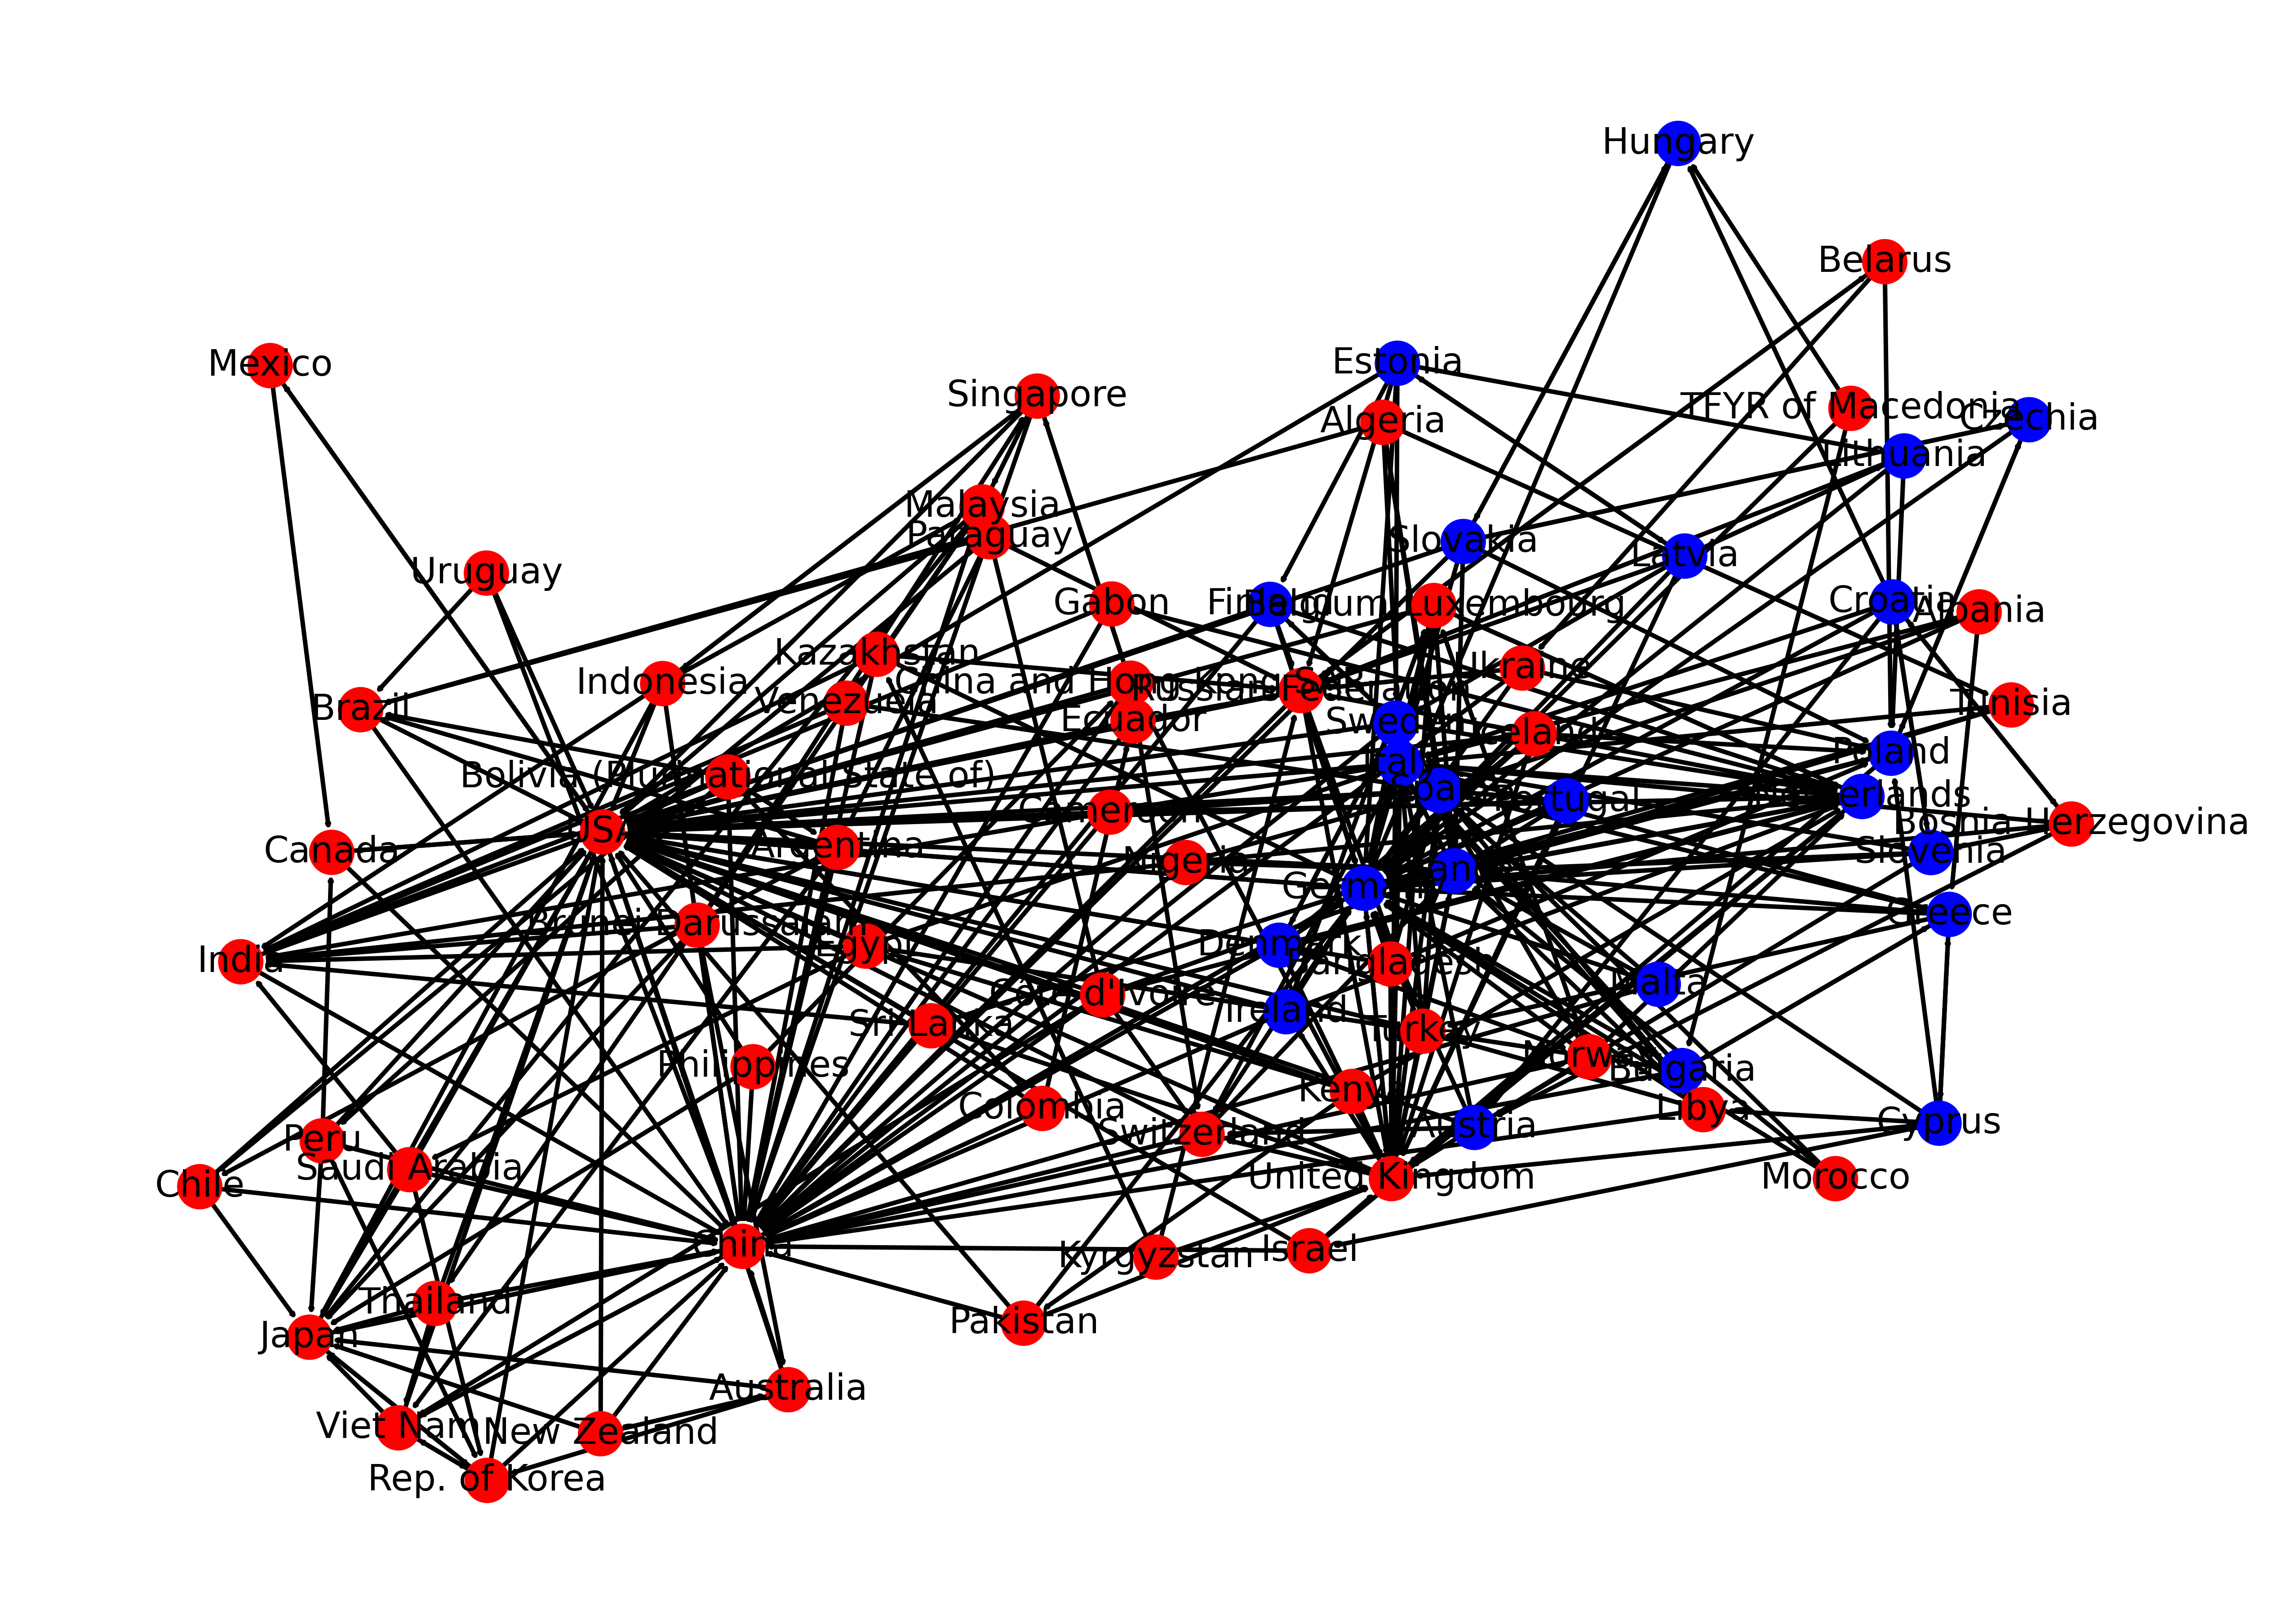

In [69]:
Graph_2020_UE=nx.MultiDiGraph()
Graph_2020_UE = nx.from_pandas_edgelist(data_relevant, 'exporter_name', 'importer_name', True, nx.MultiDiGraph())
color_UE=list(pd.DataFrame(Graph_2020_UE.nodes())[0].apply(is_in_UE))
plt.figure(3, figsize=(70,50))
nx.draw(Graph_2020_UE, 
        with_labels=True, 
        font_size=80, 
        node_color=color_UE, 
        node_size=10000, #this should be dependent of exporter volume, or maybe log of exportervolume
        width = 10
        #this should be dependent on trade volume
       )
# plt.savefig('graph_2020.png', dpi=300, bbox_inches='tight')
plt.show()

### Importer and exporter networks comparison

In [2]:
country_data=pd.read_csv('data_complete_3_years.csv')
data_2018_exp=country_data[country_data['relative_volume_2018']>.05][['exporter_name', 'importer_name']]
country_data=pd.read_csv('data_complete_3_years.csv')
data_2020_exp=country_data[country_data['relative_volume_2020']>.05][['exporter_name', 'importer_name']]
country_data=pd.read_csv('data_complete_3_years.csv')
data_2019_exp=country_data[country_data['relative_volume_2019']>.05][['exporter_name', 'importer_name']]

In [3]:
def add_relative_volume(df, year):
    df_temp = df.copy()
    rel_vols = []
    for exp in df_temp.exporter.unique():
        total_volume = df_temp[df_temp["importer"] == exp]["v"+str(year)].sum()
        for vol in df_temp[df_temp["importer"] == exp]["v"+str(year)]:
            rel_vol = vol/total_volume
            rel_vols.append(rel_vol)
    df_temp["relative_volume"+"_"+str(year)+'_importer'] = rel_vols
    return df_temp

In [4]:
country_data=add_relative_volume(country_data, 2018)
country_data=add_relative_volume(country_data, 2019)
country_data=add_relative_volume(country_data, 2020)

In [5]:
data_2018_imp=country_data[country_data['relative_volume_2018_importer']>.05][['exporter_name', 'importer_name']]
data_2019_imp=country_data[country_data['relative_volume_2019_importer']>.05][['exporter_name', 'importer_name']]
data_2020_imp=country_data[country_data['relative_volume_2020_importer']>.05][['exporter_name', 'importer_name']]

In [6]:
Graph_2018_exp = nx.from_pandas_edgelist(data_2018_exp, 'exporter_name', 'importer_name', None, nx.MultiDiGraph())
Graph_2019_exp = nx.from_pandas_edgelist(data_2019_exp, 'exporter_name', 'importer_name', None, nx.MultiDiGraph())
Graph_2020_exp = nx.from_pandas_edgelist(data_2020_exp, 'exporter_name', 'importer_name', None, nx.MultiDiGraph())

In [7]:
Graph_2018_imp = nx.from_pandas_edgelist(data_2018_imp, 'importer_name', 'exporter_name', None, nx.MultiDiGraph())
Graph_2019_imp = nx.from_pandas_edgelist(data_2019_imp, 'importer_name', 'exporter_name', None, nx.MultiDiGraph())
Graph_2020_imp = nx.from_pandas_edgelist(data_2020_imp, 'importer_name', 'exporter_name', None, nx.MultiDiGraph())

In [23]:
liste_graphe=[[Graph_2018_exp,'Graph_2018_exp'], [Graph_2019_exp,'Graph_2019_exp'], [Graph_2020_exp,'Graph_2020_exp'],
              [Graph_2018_imp,'Graph_2018_imp'], [Graph_2019_imp,'Graph_2019_imp'], [Graph_2020_imp,'Graph_2020_imp']]
for i in liste_graphe :
    print(str(i[1]))
    print(nx.overall_reciprocity(i[0]))
    print(i[0].number_of_edges())

Graph_2018_exp
0.2204724409448819
381
Graph_2019_exp
0.21298701298701297
385
Graph_2020_exp
0.21220159151193635
377
Graph_2018_imp
0.17708333333333334
384
Graph_2019_imp
0.18508997429305912
389
Graph_2020_imp
0.19843342036553524
383


In [24]:
liste_weight=[]
Graph_2018_w=nx.MultiDiGraph()
Graph_2019_w=nx.MultiDiGraph()
Graph_2020_w=nx.MultiDiGraph()

#### Total weight, in each sense and for exports and imports

In [26]:
edgeList=list(Graph_2018_imp.edges())+list(Graph_2018_exp.edges())
edgeweight=collections.Counter(edgeList)
for i in edgeweight :
    weights=edgeweight[i]
    if (i[1], i[0]) in edgeweight :
        weights+=edgeweight[(i[1], i[0])]
    Graph_2018_w.add_edge(i[0],i[1], weight=weights)
allW_2018=[i[2]['weight']for i in Graph_2018_w.edges(data=True)]

In [27]:
edgeList2019=list(Graph_2019_imp.edges())+list(Graph_2019_exp.edges())
edgeweight2019=collections.Counter(edgeList2019)
for i in edgeweight2019 :
    weights=edgeweight2019[i]
    if (i[1], i[0]) in edgeweight2019 :
        weights+=edgeweight2019[(i[1], i[0])]
    Graph_2019_w.add_edge(i[0],i[1], weight=weights)
allW_2019=[i[2]['weight']for i in Graph_2019_w.edges(data=True)]

In [28]:
edgeList2020=list(Graph_2020_imp.edges())+list(Graph_2020_exp.edges())
edgeweight2020=collections.Counter(edgeList2020)
for i in edgeweight2020 :
    weights=edgeweight2020[i]
    if (i[1], i[0]) in edgeweight2020 :
        weights+=edgeweight2020[(i[1], i[0])]
    Graph_2020_w.add_edge(i[0],i[1], weight=weights)
allW_2020=[i[2]['weight']for i in Graph_2020_w.edges(data=True)]

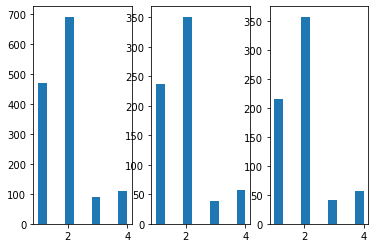

In [41]:
fig, axs = plt.subplots(1,3)
axs[0].hist(allW_2018)
axs[1].hist(allW_2019)
axs[2].hist(allW_2020)
plt.show()

In [19]:
#few links that are both central in importation and exportation of two countries in both sense : many unilateral power

#### Share of countries depending on a country that do not depends on it

In [43]:
list_depending=[]
for i in Graph_2018_imp.edges() :
    if (i[1], i[0]) in Graph_2018_exp.edges() :
        list_depending.append(i)

list_depending_2019=[]
for i in Graph_2019_imp.edges() :
    if (i[1], i[0]) in Graph_2019_exp.edges() :
        list_depending_2019.append(i)
        
list_depending_2020=[]
for i in Graph_2020_imp.edges() :
    if (i[1], i[0]) in Graph_2020_exp.edges() :
        list_depending_2020.append(i)

In [44]:
#necesarily unilateraly depends on a country that trades more 

In [45]:
list_depending

[('China', 'Argentina'),
 ('China', 'Australia'),
 ('China', 'Bolivia (Plurinational State of)'),
 ('China', 'Brazil'),
 ('China', 'Canada'),
 ('China', 'Switzerland'),
 ('China', 'Chile'),
 ('China', 'Cameroon'),
 ('China', 'Colombia'),
 ('China', 'Germany'),
 ('China', 'Ecuador'),
 ('China', 'Egypt'),
 ('China', 'Finland'),
 ('China', 'Gabon'),
 ('China', 'United Kingdom'),
 ('China', 'China and Hong Kong SAR'),
 ('China', 'Indonesia'),
 ('China', 'India'),
 ('China', 'Israel'),
 ('China', 'Japan'),
 ('China', 'Kazakhstan'),
 ('China', 'Rep. of Korea'),
 ('China', 'Libya'),
 ('China', 'Malta'),
 ('China', 'Malaysia'),
 ('China', 'New Zealand'),
 ('China', 'Pakistan'),
 ('China', 'Peru'),
 ('China', 'Philippines'),
 ('China', 'Russian Federation'),
 ('China', 'Saudi Arabia'),
 ('China', 'Singapore'),
 ('China', 'Slovakia'),
 ('China', 'Thailand'),
 ('China', 'Ukraine'),
 ('China', 'Uruguay'),
 ('China', 'USA'),
 ('China', 'Venezuela'),
 ('China', 'Viet Nam'),
 ('Germany', 'Albania'),


In [69]:
list_unilateraly_depending=[]
for i in list_depending :
    if (i[1], i[0]) not in Graph_2018_imp.edges() and (i[0], i[1]) not in Graph_2018_exp.edges() :
        list_unilateraly_depending.append(i)
list_unilateraly_depending_2019=[]
for i in list_depending_2019 :
    if (i[1], i[0]) not in Graph_2019_imp.edges() and (i[0], i[1]) not in Graph_2019_exp.edges() :
        list_unilateraly_depending_2019.append(i)
list_unilateraly_depending_2020=[]
for i in list_depending_2020 :
    if (i[1], i[0]) not in Graph_2020_imp.edges() and (i[0], i[1]) not in Graph_2020_exp.edges() :
        list_unilateraly_depending_2020.append(i)

In [70]:
print('2018',len(list_unilateraly_depending), len(list_depending))
print('2019',len(list_unilateraly_depending_2019), len(list_depending_2019))
print('2020', len(list_unilateraly_depending_2020), len(list_depending_2020))


2018 168 244
2019 169 246
2020 172 249


In [39]:
#unilateraly depending => weight=2, depending => weight>1

In [48]:
list_influential_country=[]
for i in list_unilateraly_depending :
    list_influential_country.append(i[0])
list_influential_country_2019=[]
for i in list_unilateraly_depending_2019 :
    list_influential_country_2019.append(i[0])
list_influential_country_2020=[]
for i in list_unilateraly_depending_2020 :
    list_influential_country_2020.append(i[0])


In [62]:
number_influenced=[]
for i in list(set(list_influential_country)) :
    number_influenced.append(list_influential_country.count(i))
influential = pd.DataFrame()
influential['country']=list(set(list_influential_country))
influential['number of depending countries 2018']=number_influenced


number_influenced_2019=[]
for i in list(set(list_influential_country_2019)) :
    number_influenced_2019.append(list_influential_country_2019.count(i))
influential_2019 = pd.DataFrame()
influential_2019['country']=list(set(list_influential_country_2019))
influential_2019['number of depending countries 2019']=number_influenced_2019

number_influenced_2020=[]
for i in list(set(list_influential_country_2020)) :
    number_influenced_2020.append(list_influential_country_2020.count(i))
influential_2020 = pd.DataFrame()
influential_2020['country']=list(set(list_influential_country_2020))
influential_2020['number of depending countries 2020']=number_influenced_2020

In [63]:
influential_total=influential.merge(influential_2019, on='country', how='outer').merge(
    influential_2020, on='country', how='outer')
influential_total[influential_total['number of depending countries 2020']>1]

,country,number of depending countries 2018,number of depending countries 2019,number of depending countries 2020
1,Spain,4.0,2.0,2.0
2,Australia,1.0,1.0,2.0
3,Brazil,3.0,3.0,3.0
5,France,7.0,6.0,7.0
6,Russian Federation,7.0,7.0,7.0
7,Turkey,1.0,1.0,2.0
8,USA,27.0,29.0,27.0
9,Germany,28.0,31.0,28.0
10,China,34.0,36.0,38.0
14,Poland,3.0,3.0,4.0


In [44]:
#not such a large number for USA !

In [71]:
C_2020=[i for i in list_unilateraly_depending_2020 if i[0]=='China']
C_2018=[i for i in list_unilateraly_depending if i[0]=='China']

In [75]:
Cnew=[i for i in C_2020 if i not in C_2018]
Cnomore=[i for i in C_2018 if i not in C_2020]

In [76]:
Cnew

[('China', 'Bulgaria'),
 ('China', 'Brunei Darussalam'),
 ('China', "Côte d'Ivoire"),
 ('China', 'Denmark'),
 ('China', 'Ireland'),
 ('China', 'Nigeria'),
 ('China', 'Norway'),
 ('China', 'Sweden')]

In [77]:
Cnomore

[('China', 'Egypt'),
 ('China', 'United Kingdom'),
 ('China', 'Malaysia'),
 ('China', 'Viet Nam')]

In [45]:
list_unilateraly_depending

[('China', 'Argentina'),
 ('China', 'Bolivia (Plurinational State of)'),
 ('China', 'Brazil'),
 ('China', 'Canada'),
 ('China', 'Switzerland'),
 ('China', 'Chile'),
 ('China', 'Cameroon'),
 ('China', 'Colombia'),
 ('China', 'Ecuador'),
 ('China', 'Egypt'),
 ('China', 'Finland'),
 ('China', 'Gabon'),
 ('China', 'United Kingdom'),
 ('China', 'China and Hong Kong SAR'),
 ('China', 'Indonesia'),
 ('China', 'India'),
 ('China', 'Israel'),
 ('China', 'Kazakhstan'),
 ('China', 'Libya'),
 ('China', 'Malta'),
 ('China', 'Malaysia'),
 ('China', 'New Zealand'),
 ('China', 'Pakistan'),
 ('China', 'Peru'),
 ('China', 'Philippines'),
 ('China', 'Russian Federation'),
 ('China', 'Saudi Arabia'),
 ('China', 'Singapore'),
 ('China', 'Slovakia'),
 ('China', 'Thailand'),
 ('China', 'Ukraine'),
 ('China', 'Uruguay'),
 ('China', 'Venezuela'),
 ('China', 'Viet Nam'),
 ('Germany', 'Albania'),
 ('Germany', 'Belgium-Luxembourg'),
 ('Germany', 'Bulgaria'),
 ('Germany', 'Bosnia Herzegovina'),
 ('Germany', 'Switz